In [1]:
%matplotlib inline
from gammapy.maps import Map
from astropy.coordinates import SkyCoord
import astropy.io.fits as pyfits
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
from matplotlib import colors
import numpy as nm
from functools import reduce
import operator
import math
import numpy as np
import os
from matplotlib.patches import Polygon, Circle,Patch,Ellipse,Rectangle
from at2019dsg.plotting import fig_width, plot_dir, dpi
from at2019dsg.plotting import ed_big_fontsize as big_fontsize
from at2019dsg.data import data_roi, data_dir

In [2]:
# Date: 19/10/01
# Time: 20:09:18.17 UT
# RA: 314.08 (+6.56 -2.26 deg 90% PSF containment) J2000
# Dec: 12.94 (+1.50 -1.47 deg 90% PSF containment) J2000

coor_nu = SkyCoord(ra=314.08, dec=12.94, unit='deg', frame='fk5')

##TDE
tde_ra = 314.262416 
tde_dec = 14.204515
coor_src = SkyCoord(ra=tde_ra, dec=tde_dec, unit='deg', frame='fk5')


#Create a WCS Map
m_wcs = Map.create(binsz=0.1145, map_type='wcs', skydir=coor_src, width=15.0)


In [3]:
__b_cdict={
        'red':((0.0,  0.0, 0.0),
               (0.25, 0.0, 0.0),
               (0.5,  1.0, 1.0),
               (1.0,  1.0, 1.0)),
        'green':((0.0,  0.0, 0.0),
                 (0.5,  0.0, 0.0),
                 (0.75, 1.0, 1.0),
                 (1.0,  1.0, 1.0)),
        'blue':((0.0,  0.0, 0.0),
                (0.25, 1.0, 1.0),
                (0.5,  0.0, 0.0),
                (0.75, 0.0, 0.0),
                (1.0,  1.0, 1.0))
}
b = colors.LinearSegmentedColormap('b',__b_cdict,256)

cmap = b #mpl.cm.jet
cmap.set_under('k')
cmap.set_bad('k')

<ipython-input-4-ef0404ca995f>:51: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect = Rectangle((coor_nu.ra.deg-2.26,coor_nu.dec.deg-1.47),6.56 +2.26 , +1.50 +1.47, angle=0.0,color = 'C1',transform=ax.get_transform('fk5'),facecolor = 'None', label = 'IC-191001A 90% containment',fill = False,linewidth = 2.)


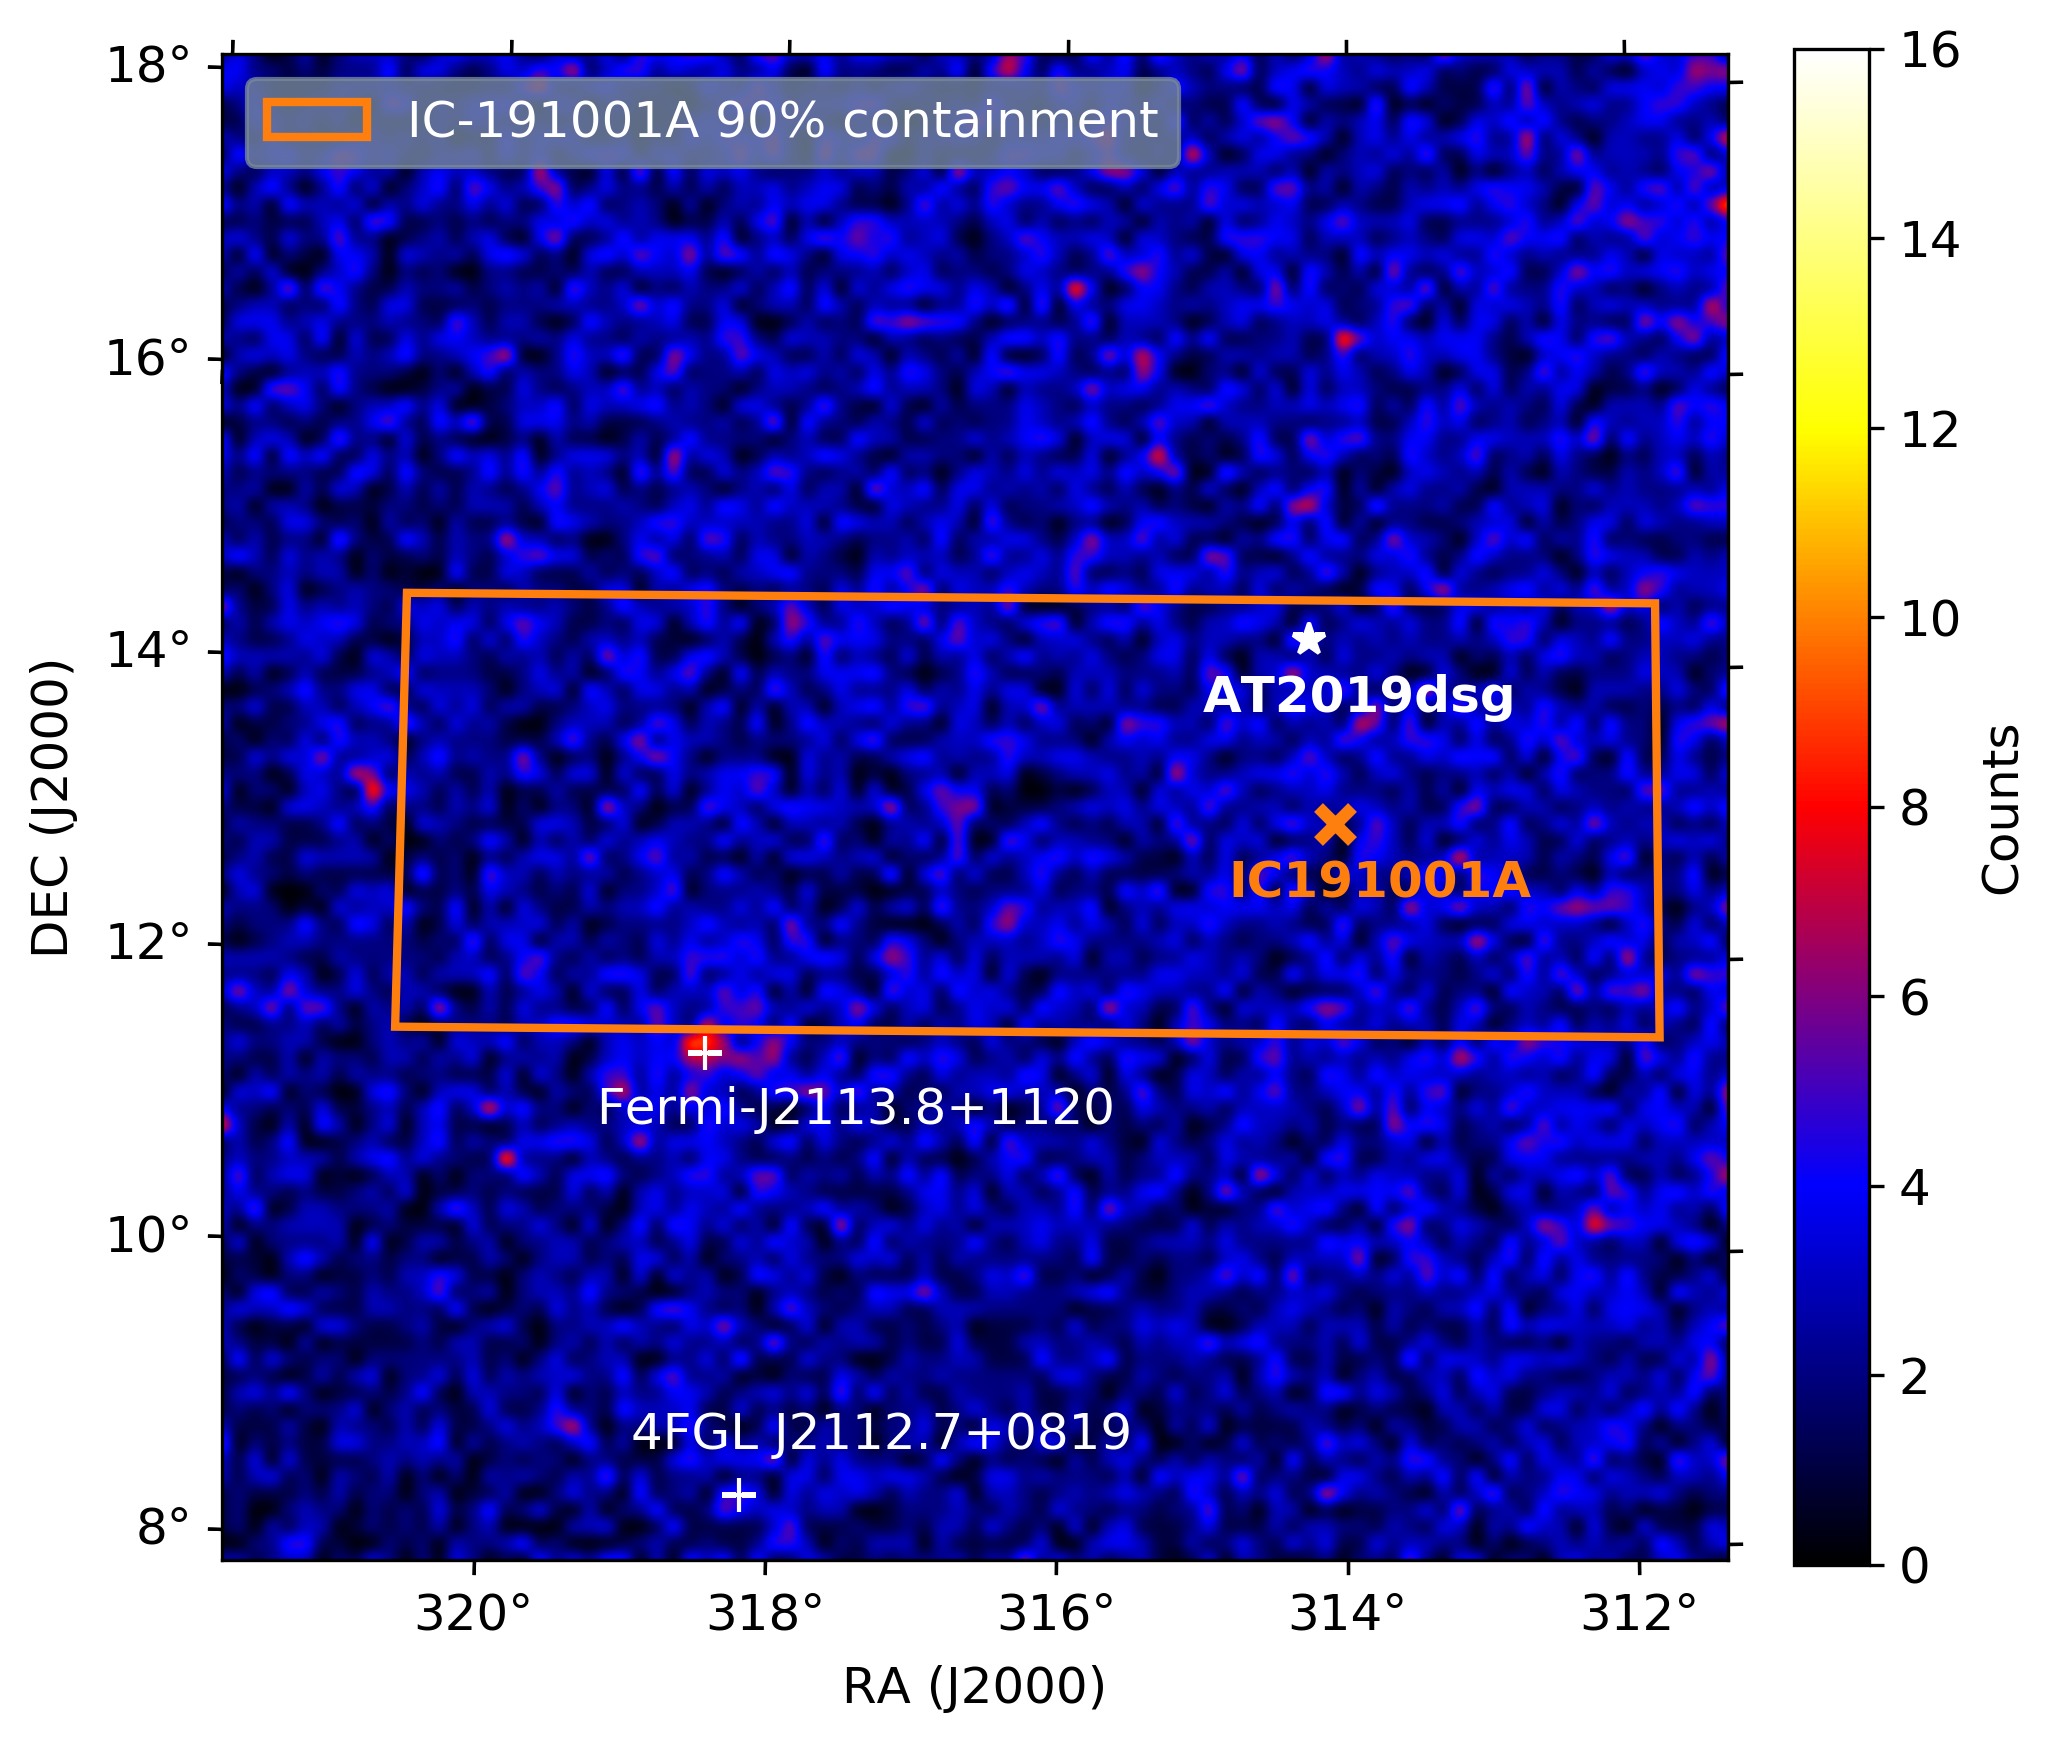

In [4]:
m_wcs = Map.read(os.path.join(data_dir, 'TDE_countmap.fits'), hdu='IMAGE')

source_name = 'AT2019dsg'

fig, ax, im = m_wcs.plot(cmap=cmap,vmin = 0.,vmax = 16,interpolation = 'gaussian')
fig.set_size_inches(fig_width, fig_width)
fig.set_dpi(dpi)
ax.set_xlabel('RA (J2000)', fontsize = big_fontsize)
ax.set_ylabel('DEC (J2000)', fontsize = big_fontsize)

ax.plot(coor_nu.ra.deg,coor_nu.dec.deg,marker = 'x',color = 'C1',markersize = 8,mew = 3,transform=ax.get_transform('fk5'))
ax.text(coor_nu.ra.deg+0.75,coor_nu.dec.deg-0.5,'IC191001A',color = 'C1',fontsize=big_fontsize,transform=ax.get_transform('fk5'),fontweight = 'bold')

## Plot source positions
source_list = data_roi[b'sources'].keys()
#del source_list['isodiff']
#del source_list['galdiff']

for source_ in source_list:
    if source_ == b'isodiff': continue
    if source_ == b'galdiff': continue
    if 'TDE' in data_roi[b'sources'][source_][b'name'].decode(): continue
    skydir_ = SkyCoord(ra = data_roi[b'sources'][source_][b'ra'], dec = data_roi[b'sources'][source_][b'dec'] ,unit = 'deg', frame = 'fk5')
    
    if skydir_.separation(coor_nu).deg < 15.:
        
        if 'PS' in data_roi[b'sources'][source_][b'name'].decode():
            ps_name = data_roi[b'sources'][source_][b'name'].decode()
            ps_name = ps_name.replace('PS ','Fermi-')
            ax.text(data_roi[b'sources'][source_][b'ra']+0.75,data_roi[b'sources'][source_][b'dec']-0.5,ps_name,color = 'white',fontsize = big_fontsize,transform=ax.get_transform('fk5'),)
        if '4FGL J2112.7+0819' in data_roi[b'sources'][source_][b'name'].decode():
            ps_name = data_roi[b'sources'][source_][b'name'].decode()
            ax.text(data_roi[b'sources'][source_][b'ra']+0.75,data_roi[b'sources'][source_][b'dec']+0.3,ps_name,color = 'white',fontsize = big_fontsize,transform=ax.get_transform('fk5'),)


        if data_roi[b'sources'][source_][b'ts'] < 25.: continue
        ax.plot(data_roi[b'sources'][source_][b'ra'],data_roi[b'sources'][source_][b'dec'],linewidth = 1.,color='white',transform=ax.get_transform('fk5'),marker = '+',markersize = 8,markeredgewidth = 1.)


for im in ax.get_children():
    if type(im) == matplotlib.image.AxesImage: break
cbar = plt.colorbar(im,cmap=cmap,label = 'Counts',ax = ax,fraction=0.046, pad=0.04)
cbar.ax.tick_params(labelsize=big_fontsize)
cbar.set_label(label='Counts',fontsize=big_fontsize)
#plt.title('LAT counts map',fontsize=14.5,pad = 15.,fontweight='bold')

##TDE
ax.text(coor_src.ra.deg+0.75,coor_src.dec.deg-0.5,source_name,color = 'white',fontsize = big_fontsize,transform=ax.get_transform('fk5'),fontweight = 'bold')
ax.plot(coor_src.ra.deg,coor_src.dec.deg,linewidth = 1.,color='white',transform=ax.get_transform('fk5'),marker = '*',markersize = 8,markeredgewidth = 1.)

rect = Rectangle((coor_nu.ra.deg-2.26,coor_nu.dec.deg-1.47),6.56 +2.26 , +1.50 +1.47, angle=0.0,color = 'C1',transform=ax.get_transform('fk5'),facecolor = 'None', label = 'IC-191001A 90% containment',fill = False,linewidth = 2.)
ax.add_patch(rect)

ax.set_xlim(0.,90.)
ax.set_ylim(10.,100.)
lon = ax.coords[0]
lat = ax.coords[1]
leg = ax.legend(loc='upper left',fontsize = big_fontsize, facecolor = 'lightslategrey',edgecolor = 'lightslategrey')#,framealpha = 0.8)

for text in leg.get_texts():
    plt.setp(text, color = 'w')

lat.set_major_formatter('dd')
lon.set_major_formatter('dd')
ax.tick_params(axis='both', which='major', labelsize=big_fontsize)

plt.savefig(os.path.join(plot_dir, 'extended_data_figure_4_lat_countmap.jpg'),bbox_inches='tight')